<a href="http://landlab.github.io"><img style="float: left" 
src="https://avatars3.githubusercontent.com/u/7543483?s=200&v=4"></a>



## Reuse Ecohydrology Model with Gridded Hydrometeorology Forcing 


* Define a geographic subset (New Mexico) within the North America and download gridded meteorological data for this region. (for brevity, this is done in a supplemental notebook)
* Calculate mean climatology for a range of elevation bands.
* Run the Landlab ecohydrology model for a watershed given various climate scenarios.<br />
* Observe sensitivity to climate by comparing the watershed model results. <br />
<hr> <small> 

## To run this notebook:

Click in or on each shaded code block below and use ***shift + enter*** or ***shift + return*** keys. Alternatively, you can run groups of cells by clicking ***Cell*** on the menu above and selecting among the various run options. This is also where you can clear outputs from previous runs.

If an error occurs, click on ***Kernel*** and then select ***Restart and Clear Outputs*** in the menu above. While exiting the notebook, click ***File*** and then select ***Close and Halt***.
<br />For more instructions on how to run an interactive IPython notebook, click here: <a href="https://github.com/landlab/tutorials/blob/master/README.md">https://github.com/landlab/tutorials/blob/master/README.md</a></small><br>
<small>For tutorials on learning Landlab, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<br>
<small>For the unexpanded version to download and run, click here: <a href="http://nbviewer.jupyter.org/github/landlab/tutorials/blob/master/ecohydrology/cellular_automaton_vegetation_DEM/cellular_automaton_vegetation_DEM_unexpanded.ipynb">http://nbviewer.jupyter.org/github/landlab/tutorials/blob/master/ecohydrology/cellular_automaton_vegetation_DEM/cellular_automaton_vegetation_DEM_unexpanded.ipynb</a></small><br>

## 1. Introduction

**1.1 Landlab Ecohydrology Model**

In this tutorial you will explore the role of climatology on the spatial development of tree, shrub, and grass Plant Functional Types (PFTs) in a semiarid setting. You will run an ecohydrologic vegetation dynamics model, written using Landlab - a python toolkit for modeling earth surface processes, on a hypothetical flat watershed with varied climatology. The ecohydrologic vegetation dynamics model you will use is based on CATGraSS, a discrete time cellular automata (CA) model for spatial evolution of PFTs [Zhou et al., 2013].  Each cell in the domain can be occupied by a single PFT: Tree, Shrub, Grass or left unoccupied as bare soil. The model couples local ecohydrologic vegetation dynamics, which simulate biomass production based on local soil moisture and actual evapotranspiration, with spatial processes for plant establishment and mortality controlled by seed dispersal rules, water stress tolerance, and space availability (Figure 1). Tree and shrub plants disperse seeds to their neighbors. Grass seeds are assumed to be available at each cell. Establishment of plants in empty cells is determined probabilistically based on water stress of each PFT. Plants with lower water stress have higher probability of establishment. Plant mortality is simulated probabilistically as a result of aging and drought stress.

![CATGraSSFlowChart](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/CATGraSSFlowChart.jpeg)
<center>Figure 1. Ecohydrologic vegetation dynamics model [Modified from Zhou et al., 2013]</center>

The model is driven by rainfall pulses (observed or generated), solar radiation and temperature. The latter two variables can also be used to prescribe a seasonal potential evapotranspiration input. In Landlab, the model is implemented as a set of interacting components, each describing a different element of the coupled system: PrecipitationDistribution, Radiation, PotentialEvapotranspiration, SoilMoisture, Vegetation (component for local vegetation growth), and VegCA (component for cellular automaton establishment and mortality of PFTs, i.e. spatial dynamics of vegetation pattern evolution). Each process can also operate in isolation, outside the context of this example model. Landlab components and the flow chart used to couple the components in the model driver is given below [Hobley et al., 2017]. 


![CATGraSSComponents](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/CATGraSSComponents.jpg)
<center>Figure 2. Landlab components (left column) and the flow chart of their implementation in Landlab to develop the cellular automaton plant competition model [Hobley et al. 2017]</center>

This model is available as a function 'run_ecohydrology_model', that can be imported from python script 'supporting_files/ecohydrology_model_functions.py'. It contains [Ref. Figure 2]:
  - A local vegetation dynamics model that simulates storm and inter-storm water balance and ecohydrologic fluxes (ET, runoff), and plant biomass dynamics by coupling the following components:
        - PrecipitationDistribution
        - Radiation
        - PotentialEvapotranspiration
        - SoilMoisture
        - Vegetation

  - A spatially explicit probabilistic cellular automaton component that simulates plant competition by tracking establishment and mortality of plants based on soil moisture stress:
        - VegCA
    

**References used in this notebook**:

Phuong, J., Bandaragoda C., Istanbulluoglu, E., Beveridge, C., Strauch, R., Setiawan, L., Mooney, S. D. (in-review). Automated retrieval, preprocessing, and visualization of gridded hydrometeorology data products for spatial-temporal exploratory analysis and intercomparison.

Hobley, D. E. J., Adams, J. M., Nudurupati, S. S., Hutton, E. W. H., Gasparini, N. M., Istanbulluoglu, E., and Tucker, G. E. (2017). Creative computing with Landlab: an open-source toolkit for building, coupling, and exploring two-dimensional numerical models of Earth-surface dynamics, Earth Surf. Dynam. doi:10.5194/esurf-5-21-2017.

Livneh B., T.J. Bohn, D.S. Pierce, F. Munoz-Ariola, B. Nijssen, R. Vose, D. Cayan, and Brekke, L.D. (2015). A spatially comprehensive, hydrometeorological data set for Mexico, the U.S., and southern Canada 1950-2013, Nature Scientific Data, 5:150042, doi:10.1038/sdata.2015.42.

Zhou, X., Istanbulluoglu, E., & Vivoni, E. R. (2013). Modeling the ecohydrological role of aspect‐controlled radiation on tree‐grass‐shrub coexistence in a semiarid climate. Water Resources Research, 49(5), 2872-2895.

Moore D. (2011). Meteorology Data from the Sevilleta National Wildlife Refuge, New Mexico (1988- present). Environmental Data Initiative. https://doi.org/10.6073/pasta/4d71c09b242602114fb684c843e9d6ac.

Middleton, N. J., and Thomas, D. S. G., (1997)., World Atlas of Desertification, UNEP Edward Arnold, London, UK, 2nd edition.

**1.2 Landscape**

In this tutorial, we are going to work with a hypothetical rectangular domain over which we will impose elevation-dependent climatology from New Mexico, USA to simulate vegetation patterns using the ecohydrologic model discussed in Figure 1 and 2. The climate in this area is semi-arid with Mean Annual Precipitation (MAP) in the range 200 - 350 mm depending on the elevation.

The steps used for downloading gridded meteorology data and processing it are included in a separate Notebook [New Mexico Climate Data Notebook](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/ogh_newmexico/observatory_gridmet_newmexico.ipynb) in this Hydroshare resource, and is imported as part of this exercise.

**1.3 Steps to Explore the Model** 

We will do the following: 
- Import and review pre-processed gridded hydroclimatology data dictionaries for three different elevation bands. 
- Run the coupled Ecohydrology and cellular automata plant competition model for ~250 years with a daily timestep. 
- Visualize and examine spatio-temporal outputs.

Start at the top by reading each block of text and sequentially running each code block (put your curser in a code block and type shift + enter OR got to the _Cell_ pulldown menu at the top and choose _Run Cells_). 

Remember that you can always go to the _Kernel_ pulldown menu at the top and choose _Restart & Clear Output_ or _Restart & Run All_ if you change things and want to start afresh. 



## 2.0 Data Science & Cyberinfrastructure Methods

Update or add libraries that are not installed on the CUAHSI JupyterHub server.  At the time of publication, the Landlab library was dependent on a different numpy library than installed in the software environment. The code block below was added as an example of how to update a library to a new version and restart the notebook kernel.  If this update is not needed, comment with a <#>.  If other updates are needed, add them below.

In [ ]:
# comment this out if this update is not needed
!conda update -y numpy
from IPython.display import display_html
display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



### 2.1 Data Science Methods

**2.1.1 Import Landlab components, functions for importing data, plotting tools, and HydroShare utilities**

To run this notebook, we must import several libraries.
The hs_utils library provides functions for interacting with HydroShare, including resource querying, dowloading. and creation. Additional libraries support the functions of Landlab.

In [1]:
#Landlab toolkit available on CUAHSI JupyterHub 
from landlab import RasterModelGrid as rmg

#Python libraries available on CUAHSI JupyterHub 
import os
import pandas as pd, numpy as np, dask, json
from datetime import datetime, timedelta
import geopandas as gpd

# plotting and shape libraries
%matplotlib inline
import matplotlib.pyplot as plt

# tools for processing gridded hydro-meteorology data
import ogh

# silencing warning
import warnings 
warnings.filterwarnings('ignore')

#HydroShare Utilities
from hstools import hydroshare
hs = hydroshare.hydroshare()

Successfully established a connection with HydroShare


**2.1.2 Where are we in Hydroshare space?**

In [2]:
homedir = os.getcwd()
print('Data will be loaded from and saved to:\n' + homedir)

Data will be loaded from and saved to:
/home/jovyan/work/notebooks/data/fdc3a06e6ad842abacfa5b896df73a76/fdc3a06e6ad842abacfa5b896df73a76/data/contents


**2.1.3 Import python functions from a subfolder in this HydroShare resource**

Import the functions 'run_ecohydrology_model' (to run the ecohydrology model) and 'plot_results' (to plot outputs) from supporting python script into this Jupyter Notebook.

In [3]:
from supporting_files.ecohydrology_model_functions import run_ecohydrology_model, plot_results

## 3. Climate Science Methods

**3.1.1 Read in climate data that has been processed (in a separate notebook for convenience)**  

In this test case, we want to demonstrate how to download existing downscaled gridded national/global datasets for a region and run ecohydrology model for hypothetical flat watersheds at different elevation bands. We used the Linvneh et al.(2015) gridded hydrometeorological data in this example.  'ogh', a conda package, is used to download the data for the state of New Mexico. We then bin the data into three elevation ranges and within each bin daily precipitation (mm), minimum and maximum temperature (<sup>o</sup>C) data are spatially averaged for every day. This led to time series of daily precipitation (mm), minimum and maximum temperature in each elevation band. To keep this notebook concise (and to focus on data processing and ecohydrology model implementation), we placed the code used for this hydrometeorological data processing in a separate notebook called: 'observatory_gridmet_newmexico.ipynb', available in the sub-folder ogh_newmexico. We saved synthesized data into JSONs ('.json') files by running the notebook 'observatory_gridmet_newmexico.ipynb'. These JSONs are stored in the sub-folder 'ogh_newmexico' and are loaded into Python dicitonaries in the next code block below.

Ranges used in the three elevation bins:

Low elevation = 1200 - 1700 m

Mid elevation = 1700 - 2000 m

High elevation = 2000 - 2500 m

![New Mexico Climate by ELevation](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/NewMexico_elevationbands.JPG)
 
<center>**Figure 3.** New Mexico climate bands by elevation correspond with high elevation (white) with trees (dark green in aerial photography).</center>

Let's download the saved meteorological data (JSON files) into Python dictionaries. We create one dictionary for each elevation band. Each dictionary contains time series of 28 variables. These time series are stored as 'key':'value' pairs, where each variable name is a 'key' and the corresponding time series is the 'value'. 

In [4]:
# These files are processed from 
# https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/observatory_gridmet_newmexico.ipynb
ltm_low=ogh.readDictOfDf(os.path.join(homedir, 'ogh_newmexico/NewMexico_lowElevation.json'))
ltm_mid=ogh.readDictOfDf(os.path.join(homedir, 'ogh_newmexico/NewMexico_midElevation.json'))
ltm_high=ogh.readDictOfDf(os.path.join(homedir, 'ogh_newmexico/NewMexico_highElevation.json'))

**3.1.2 Review statistics and variables available within a dictionary, e.g. Low Elevation**

We can look at the names of all 28 variables in each dictionary below. 

In [5]:
sorted(ltm_low.keys())

['anom_year_PRECIP_dailymet_livneh2015',
 'anom_year_TMAX_dailymet_livneh2015',
 'anom_year_TMIN_dailymet_livneh2015',
 'anom_year_WINDSPD_dailymet_livneh2015',
 'meanallyear_PRECIP_dailymet_livneh2015',
 'meanallyear_TMAX_dailymet_livneh2015',
 'meanallyear_TMIN_dailymet_livneh2015',
 'meanallyear_WINDSPD_dailymet_livneh2015',
 'meandaily_PRECIP_dailymet_livneh2015',
 'meandaily_TMAX_dailymet_livneh2015',
 'meandaily_TMIN_dailymet_livneh2015',
 'meandaily_WINDSPD_dailymet_livneh2015',
 'meanmonth_PRECIP_dailymet_livneh2015',
 'meanmonth_TMAX_dailymet_livneh2015',
 'meanmonth_TMIN_dailymet_livneh2015',
 'meanmonth_WINDSPD_dailymet_livneh2015',
 'meanyear_PRECIP_dailymet_livneh2015',
 'meanyear_TMAX_dailymet_livneh2015',
 'meanyear_TMIN_dailymet_livneh2015',
 'meanyear_WINDSPD_dailymet_livneh2015',
 'month_PRECIP_dailymet_livneh2015',
 'month_TMAX_dailymet_livneh2015',
 'month_TMIN_dailymet_livneh2015',
 'month_WINDSPD_dailymet_livneh2015',
 'year_PRECIP_dailymet_livneh2015',
 'year_TMA

**3.1.3 Extract selected variables from the dictionary**

The ecohydrology model uses daily precipitation, daily maximum and minimum temperature time series as spatially uniform input over the modeled domain. This model uses daily maximum and minimum temperatures to calculate Potential Evapotranspiration (PET) using 'The Priestley Taylor' method. In the code block below we assign a variable for each input time series and load data from the dictionaries listed above.

In [6]:
# Mean daily precipitation
P_met_low = ltm_low['meandaily_PRECIP_dailymet_livneh2015'] # Precipitation in mm
P_met_mid = ltm_mid['meandaily_PRECIP_dailymet_livneh2015'] # Precipitation in mm
P_met_high = ltm_high['meandaily_PRECIP_dailymet_livneh2015'] # Precipitation in mm

# Mean daily maximum temperature
Tmax_met_low = ltm_low['meandaily_TMAX_dailymet_livneh2015'] # Tmax in C
Tmax_met_mid = ltm_mid['meandaily_TMAX_dailymet_livneh2015'] # Tmax in C
Tmax_met_high = ltm_high['meandaily_TMAX_dailymet_livneh2015'] # Tmax in C

# Mean daily minimum temperature
Tmin_met_low = ltm_low['meandaily_TMIN_dailymet_livneh2015'] # Tmin in C
Tmin_met_mid = ltm_mid['meandaily_TMIN_dailymet_livneh2015'] # Tmin in C
Tmin_met_high = ltm_high['meandaily_TMIN_dailymet_livneh2015'] # Tmin in C

In the code blocks below, we calculate and print Mean Annual Precipitation (MAP) values in each elevation band.

In [7]:
# Check Mean Annual Precipitation
P_met_low_MAP = np.mean(P_met_low.values)*365.
P_met_mid_MAP = np.mean(P_met_mid.values)*365.
P_met_high_MAP = np.mean(P_met_high.values)*365.

In [8]:
print('Low Elevation MAP = {:0.2f}'.format(P_met_low_MAP))
print('Mid Elevation MAP = {:0.2f}'.format(P_met_mid_MAP))
print('High Elevation MAP = {:0.2f}'.format(P_met_high_MAP))

Low Elevation MAP = 315.64
Mid Elevation MAP = 331.06
High Elevation MAP = 375.84


**3.1.4 Bias Correction**

From prior experience of working with watersheds in New Mexico, we suspect that MAP values obtained from downscaled climate data product are higher than observations, especially in low elevations, indicating a wetter bias. It is common to find biases in downscaled climate products. Therefore, we downloaded precipitation data from meteorological stations located in Sevilleta LTER, New Mexico [Moore 2011]. Table below lists these meteorological stations and MAP calculated from the precipitation data that extends over multiple years at respective stations. We can immediately note that MAP values derived from Livneh dataset, reported above, are higher than the observed MAP values at meteorological stations in Sevilleta. 

<center>Table 1. MAP and elevation data gathered from meteorological stations in Sevilleta LTER [Moore 2011]
![TableBiasCorrection](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/TableBiasCorrection.PNG)

One approach to deal with the incoherence between the gridded hydrometeorological data and observations is to correct any biases that might exist in the gridded data. For this purpose we can use a linear relationship derived from observations. In the figure below, MAP from each meterological station is plotted with respect to elevation and the linear relationship between MAP at a location and it's elevation is obtained. 

![BiasCorrectionPlot](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/BiasCorrectionPlot.PNG)
<center>**Figure 4.** Plotting MAP at meteorological stations in Sevilleta LTER [Table 1] with respect to elevation

We will rearrange this model to represent **MAP at a location** in terms of the **difference between it's elevation** and **minimum elevation of all hypothetical meteorological stations (centroids of the cells in gridded dataset) of New Mexico**, and **MAP at the location with minimum elevation**.

In [9]:
# z_min is the minimum elevation of all hypothetical meteorological stations in New Mexico
z_min = 850   # in meters

# Calculating 'MAP_z_min': MAP at z_min
MAP_z_min = 0.1697*z_min - 28.34

In [10]:
# Print MAP_z_min
print('MAP_z_min = {:0.2f}'.format(MAP_z_min) + ' mm')

MAP_z_min = 115.91 mm


Now, the model is rearranged as: *MAP_at_a_location* = (*elevation_at_a_location* - *z_min*) + *MAP_z_min*. Note that we use the mid value of each elevation band for input as *elevation_at_a_location* (i.e. for lowest elevation band, *elevation_at_a_location* = (1200.+1700.)/2. = 1450 m). We now calculate MAP for each elevation band below.

In [11]:
# Bias corrections to Livneh Data (ref: Caylor et. al 2005 AWR; using meteorological data from Sevilleta,NM)
MAP_lit_low = ((1200.+1700.)/2.-850)*0.1697 + MAP_z_min   # Mean annual precipitation in elev band 1 from literature in mm
MAP_lit_mid = ((1700.+2000.)/2.-850)*0.1697 + MAP_z_min   # Mean annual precipitation in elev band 1 from literature in mm
MAP_lit_high = ((2000.+2500.)/2.-850)*0.1697 + MAP_z_min   # Mean annual precipitation in elev band 1 from literature in mm

We can print calculated MAPs for each elevation band.

In [12]:
print('MAP for Low Elevation band = {:0.2f}'.format(MAP_lit_low))  
print('MAP for Mid Elevation band = {:0.2f}'.format(MAP_lit_mid))
print('MAP for High Elevation band = {:0.2f}'.format(MAP_lit_high))

MAP for Low Elevation band = 217.72
MAP for Mid Elevation band = 285.61
MAP for High Elevation band = 353.49


We use the ratio of MAP derived from gridded dataset for each elevation band and the corresponding calculated MAP from observations above, to estimate bias correction factors. Assuming that these biases persist for daily precipitation, we will adjust the daily precipitation time series obtained from gridded dataset with the estimated bias correction factors.

In [13]:
# Calculate bias correction factors for each elevation band
bc_low = float(P_met_low_MAP)/MAP_lit_low
bc_mid = float(P_met_mid_MAP)/MAP_lit_mid
bc_high = float(P_met_high_MAP)/MAP_lit_high

# Bias corrected precipitation:
P_met_low = np.array(P_met_low.values)/bc_low
P_met_mid = np.array(P_met_mid.values)/bc_mid
P_met_high = np.array(P_met_high.values)/bc_high

The estimated bias correction factors are:

In [14]:
print('Correction Factor - Low Elevation = {:0.2f}'.format(bc_low))  
print('Correction Factor - Mid Elevation = {:0.2f}'.format(bc_mid))
print('Correction Factor - High Elevation = {:0.2f}'.format(bc_high))

Correction Factor - Low Elevation = 1.45
Correction Factor - Mid Elevation = 1.16
Correction Factor - High Elevation = 1.06


**3.1.5 Plotting corrected MAP for each elevation band**

Below, we plot bias corrected MAP for each elevation band.

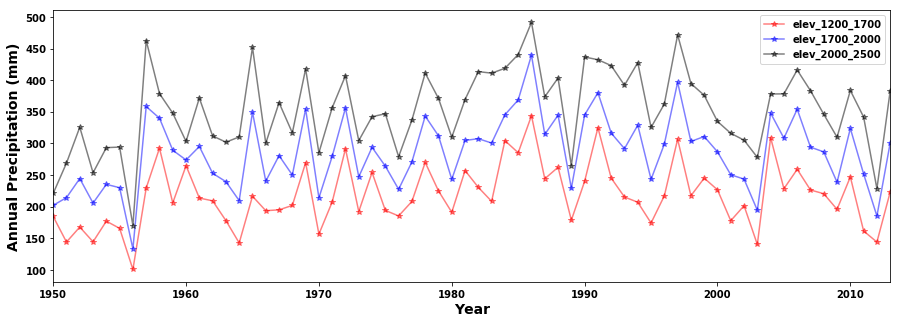

In [15]:
# print annual precipitation by elevation bands
P_fig1 = plt.figure(figsize=(15, 5))
fontdict = {'fontsize': 14, 'weight': 'bold'}
ax4 = P_fig1.add_subplot(111)
ax4.plot((ltm_low['meanyear_PRECIP_dailymet_livneh2015']*365./bc_low), 'r-*', label = 'elev_1200_1700', alpha=0.5)
ax4.plot((ltm_mid['meanyear_PRECIP_dailymet_livneh2015']*365./bc_mid), 'b-*', label = 'elev_1700_2000', alpha=0.5)
ax4.plot((ltm_high['meanyear_PRECIP_dailymet_livneh2015']*365./bc_high), 'k-*', label = 'elev_2000_2500', alpha=0.5)
plt.xlim([1950, 2013])
plt.ylabel('Annual Precipitation (mm)', fontdict=fontdict)
plt.xlabel('Year', fontdict=fontdict)
plt.xticks(np.arange(1950, 2013, step=10), fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend(prop={'weight':'bold'})
plt.show()

**3.1.6 Plotting mean monthly temperature for each elevation band**

Below, we plot mean monthly maximum and minimum temperature for each elevation band. Note that we haven't bias corrected this data.

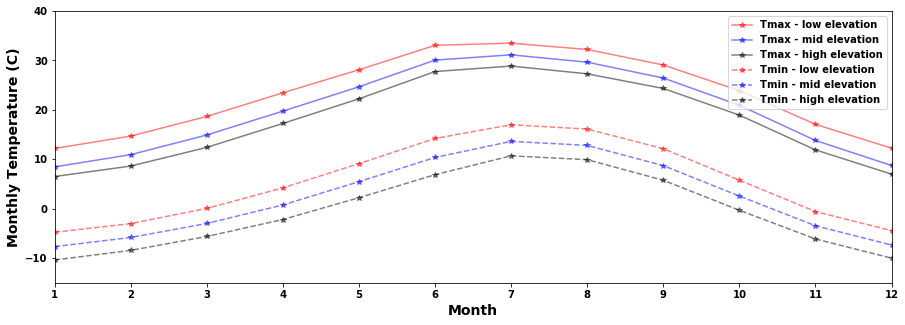

In [16]:
T_fig2 = plt.figure(figsize=(15, 5))
ax4 = T_fig2.add_subplot(111)
ax4.plot(ltm_low['meanmonth_TMAX_dailymet_livneh2015'],'r-*', label = 'Tmax - low elevation', alpha=0.5)
ax4.plot(ltm_mid['meanmonth_TMAX_dailymet_livneh2015'],'b-*', label = 'Tmax - mid elevation', alpha=0.5)
ax4.plot(ltm_high['meanmonth_TMAX_dailymet_livneh2015'],'k-*', label = 'Tmax - high elevation', alpha=0.5)

ax4.plot(ltm_low['meanmonth_TMIN_dailymet_livneh2015'],'r--*', label = 'Tmin - low elevation', alpha=0.5)
ax4.plot(ltm_mid['meanmonth_TMIN_dailymet_livneh2015'],'b--*', label = 'Tmin - mid elevation', alpha=0.5)
ax4.plot(ltm_high['meanmonth_TMIN_dailymet_livneh2015'],'k--*', label = 'Tmin - high elevation', alpha=0.5)

plt.xlim([1, 12])
plt.ylim([-15, 40])
plt.ylabel('Monthly Temperature (C)', fontdict=fontdict)
plt.xlabel('Month', fontdict=fontdict)
plt.xticks(np.arange(1, 13, step=1), fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend(loc=1, prop={'weight':'bold'})
plt.show()

We can observe that there is an inverse relationship between elevation and temperature, and a positive relationship between elevation and precipitation.

**3.1.7 Tiling of data - Extension of meteorological records by repeating available data**

The meteorological data downloaded from Livneh et al. (2015) extends from year 1950 through 2013, for a total of 64 years. Some shrubs in this area can live up to 600 years and trees up to 300 years. Therefore, we need a longer record to evolve natural vegetation patterns from a random initial condition using Landlab's ecohydrology model. To circumvent this issue, we extended the historical data by tiling (i.e., repeating the arrays for a set number of times) for 150 times so that we have input time series for 9600 years preserving the historical climate.

In [17]:
# Tiling meteorological data to extend the record to approximately 9.6k yrs.
P_met_low = np.tile(P_met_low, 150)
P_met_mid = np.tile(P_met_mid, 150)
P_met_high = np.tile(P_met_high, 150)

Tmax_met_low = np.tile(Tmax_met_low.values, 150)
Tmax_met_mid = np.tile(Tmax_met_mid.values, 150)
Tmax_met_high = np.tile(Tmax_met_high.values, 150)

Tmin_met_low = np.tile(Tmin_met_low.values, 150)
Tmin_met_mid = np.tile(Tmin_met_mid.values, 150)
Tmin_met_high = np.tile(Tmin_met_high.values, 150)

## 4. Ecohydrology Modeling using Landlab

With all the input forcings prepared, we can now run the ***ecohydrology model***. To run the *model*, we need the following:

 - a Landlab grid to represent the domain/watershed
 - a collective input file ***'InputFile'*** that includes inputs for all components used in this model
 - a Python dictionary ***'input_data'*** that includes all meteorological forcings to run the model
 - define an initial spatial organization of Plant Functional Types (PFTs) in the watershed
 - number of days ***'n'*** for which you want to run the model

**4.1.1 Initialize Landlab grids**

Landlab's ecohydrology model can operate on Landlab's raster grids (RasterModelGrid objects). We have already imported ***RasterModelGrid*** (Landlab's gridding module for raster grids) as ***rmg***. We will create three ***grid*** objects, one for each elevation band. 

In [18]:
grid_low = rmg((100, 100), spacing=(5., 5.))  # Initialize grid for low-elevation band
grid_mid = rmg((100, 100), spacing=(5., 5.))  # Initialize grid for mid-elevation band
grid_high = rmg((100, 100), spacing=(5., 5.))  # Initialize grid for high-elevation band

**4.1.2 Loading an input file for the model**

Each Landlab component used in this ecohydrology model accepts various input parameters as arguments. All input parameters for all the components used in the model can be collectively included in a single ***'.yaml'*** file and passed along to the ***run_ecohydrology_model*** function, where each component is initialized internally. For this exercise, we have calibrated each component of the model with respective input parameters and included those input values in the file named ***ecohyd_inputs.yaml***, which is available in the subfolder ***supporting_files***. Note that we will use the same input file for all elevation bands.

In [19]:
InputFile = 'supporting_files/ecohyd_inputs.yaml'

**4.1.3 Prepare dictionary that includes meteorological forcings**

For each elevation band, we will create a separate Python dictionary that includes time series of ***daily precipitation***, ***daily maximum temperature***, and ***daily minimum temperature***. 

In [20]:
# Python dictionary for meteorological inputs for low-elevation band
input_data_low = {'precip_met': P_met_low,
                  'Tmax_met': Tmax_met_low,
                  'Tmin_met': Tmin_met_low}
# Python dictionary for meteorological inputs for mid-elevation band
input_data_mid = {'precip_met': P_met_mid,
                  'Tmax_met': Tmax_met_mid,
                  'Tmin_met': Tmin_met_mid}
# Python dictionary for meteorological inputs for high-elevation band
input_data_high = {'precip_met': P_met_high,
                  'Tmax_met': Tmax_met_high,
                  'Tmin_met': Tmin_met_high}

**4.1.4  Define initial spatial organization of PFTs in the watershed**

In Landlab's ecohydrologic components, each grid cell can be occupied by one PFT (grass = 0, shrub = 1, tree = 2, bare soil =3, shrub seedling = 4, or tree seedling = 5). This spatial organization is managed by a ***cellular field*** (please see documentation for ***fields*** in Landlab for more information) named ***vegetation__plant_functional_type***. We need to set the initial spatial organization. For this tutorial, we will initialize each grid with a random organization of PFTs where each plant type (grass, shrub, and tree) will each occupy 25% of watershed area. Rest of the watershed will be left unoccupied (bare soil).

In [21]:
# Initializing PFT organization for low-elevation band
grid_low.at_cell['vegetation__plant_functional_type'] = np.random.randint(0, 6, size=grid_low.number_of_cells)
# Initializing PFT organization for mid-elevation band
grid_mid.at_cell['vegetation__plant_functional_type'] = np.random.randint(0, 6, size=grid_mid.number_of_cells)
# Initializing PFT organization for high-elevation band
grid_high.at_cell['vegetation__plant_functional_type'] = np.random.randint(0, 6, size=grid_high.number_of_cells)

We can plot to see the random organization of PFTs that we just initialized.

**Green: Grass; Red: Shrub; Black: Tree; White: Bare Soil**

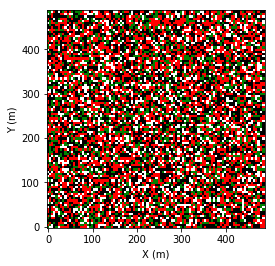

In [22]:
# Plot initial vegetation PFT state for low-elevation band
from IPython.display import Markdown, display
from landlab.plot import imshow_grid
import matplotlib as mpl
def printmd(string):
    display(Markdown(string))
cmap = mpl.colors.ListedColormap(
            ['green', 'red', 'black', 'white', 'red', 'black'])
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
printmd('**Green: Grass; Red: Shrub; Black: Tree; White: Bare Soil**')
plt.figure(101)
imshow_grid(grid_low, 'vegetation__plant_functional_type', values_at='cell', cmap=cmap,
            grid_units=('m', 'm'), norm=norm, limits=[0, 5],
            allow_colorbar=False)

**4.1.5  Set the *number of days* for which you want to run the model**

In this tutorial, we will run the ecohydrology model at a daily time step. Therefore, we can set the value for ***number of days*** by approximately fixing the number of years we want to run the model. For this demonstration, we will set the value of ***number of days*** to ***550,000 days***, i.e. for approximately ***1500*** years. 

In [23]:
# Setting number of storms
n = 550000  # approximately 1500 years

**Note:** If you are re-running this notebook, please note that the code blocks below that run the model (i.e. where ***run_ecohydrology_model*** is called), take ***approximately 15 minutes each*** to run. If you want to run the model for shorter times, select a smaller value for ***n (number of days)***.

**4.1.6 Run the model!**

We can now run the model. We will run the model thrice (once for each elevation band). Please note that, in the call to the function ***run_ecohydrology_model***, for a daily simulation ***number_of_storms*** represent the ***number of days*** for which the model is run. On a day when there is no rainfall, storm depth is set to 0. Also, note that every function run returns three outputs:
 - VegType_elevation-band: a numpy ndarray of size [number_of_years, number_of_cells_in_the_grid] - this variable can get large in size for longer simulations.
 - yrs_elevation-band: the total number of years this model has run (float)
 - debug_low: ignore this output. This is only for debugging.

**Low elevation band:**

In [24]:
(VegType_low, yrs_low, debug_low) = run_ecohydrology_model(grid_low, 
                                                           input_data=input_data_low,
                                                           input_file=InputFile,
                                                           synthetic_storms=False,
                                                           number_of_storms=n,
                                                           pet_method='PriestleyTaylor')

Elapsed time =  0  years
Elapsed time =  100  years
Elapsed time =  200  years
Elapsed time =  300  years
Elapsed time =  400  years
Elapsed time =  500  years
Elapsed time =  600  years
Elapsed time =  700  years
Elapsed time =  800  years
Elapsed time =  900  years
Elapsed time =  1000  years
Elapsed time =  1100  years
Elapsed time =  1200  years
Elapsed time =  1300  years
Elapsed time =  1400  years
Elapsed time =  1500  years


**Mid elevation band:**

In [25]:
(VegType_mid, yrs_mid, debug_mid) = run_ecohydrology_model(grid_mid, 
                                                           input_data=input_data_mid,
                                                           input_file=InputFile,
                                                           synthetic_storms=False,
                                                           number_of_storms=n,
                                                           pet_method='PriestleyTaylor')

Elapsed time =  0  years
Elapsed time =  100  years
Elapsed time =  200  years
Elapsed time =  300  years
Elapsed time =  400  years
Elapsed time =  500  years
Elapsed time =  600  years
Elapsed time =  700  years
Elapsed time =  800  years
Elapsed time =  900  years
Elapsed time =  1000  years
Elapsed time =  1100  years
Elapsed time =  1200  years
Elapsed time =  1300  years
Elapsed time =  1400  years
Elapsed time =  1500  years


**High elevation band**

In [26]:
(VegType_high, yrs_high, debug_high) = run_ecohydrology_model(grid_high,
                                                              input_data=input_data_high,
                                                              input_file=InputFile,
                                                              synthetic_storms=False,
                                                              number_of_storms=n,
                                                              pet_method='PriestleyTaylor')

Elapsed time =  0  years
Elapsed time =  100  years
Elapsed time =  200  years
Elapsed time =  300  years
Elapsed time =  400  years
Elapsed time =  500  years
Elapsed time =  600  years
Elapsed time =  700  years
Elapsed time =  800  years
Elapsed time =  900  years
Elapsed time =  1000  years
Elapsed time =  1100  years
Elapsed time =  1200  years
Elapsed time =  1300  years
Elapsed time =  1400  years
Elapsed time =  1500  years



**4.1.7  Plot and compare the results**

Now that we have run the model, we can plot results using the function ***plot_results*** for each elevation band. 

This function will first plot spatial organization of PFTs at a frequency of ***yr_step_elevation-band*** years. For the plots of spatial organization, a Green cell indicates Grass, a Red cell indicates Shrub, a Black cell indicates Tree, and a White cell indicates that it is un-occupied (bare soil). At the end, annual areal vegetation cover of each PFT is plotted with respect to time in years.

**Low elevation band:**

Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare


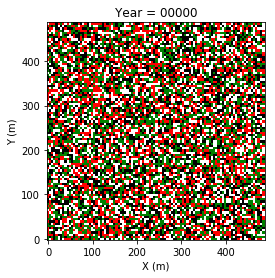

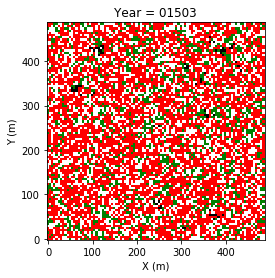

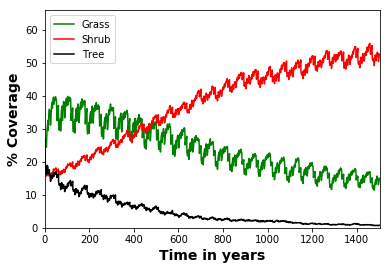

In [27]:
plot_results(grid_low, VegType_low, yrs_low, yr_step=yrs_low-1)
plt.savefig('grid_low.png')

**Mid elevation band:**

Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare


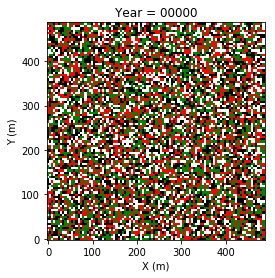

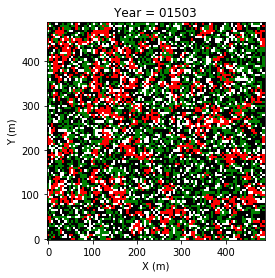

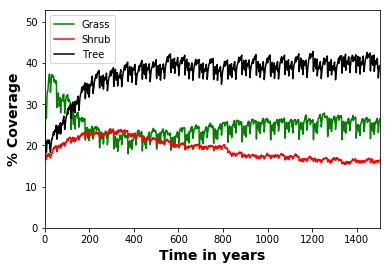

In [28]:
plot_results(grid_mid, VegType_mid, yrs_mid, yr_step=yrs_mid-1)
plt.savefig('grid_mid.png')

**High elevation band:**

Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare


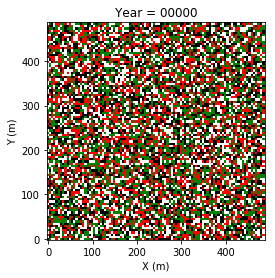

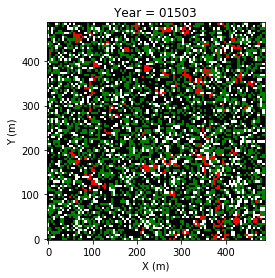

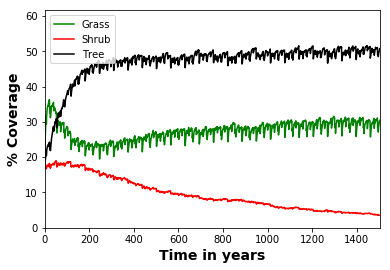

In [29]:
plot_results(grid_high, VegType_high, yrs_high, yr_step=yrs_high-1)
plt.savefig('grid_high.png')

**4.1.4  Discussion**

By comparing the ***areal vegetation cover*** and ***spatial organization*** plots above, we can make some interesting observations: <br>

 - In the low elevation band, the climate is arid (Aridity Index (AI) = 7.34) [Middleton et al. (1997)]. Drought-tolerant shrubs outcompete trees, leaving few trees. Grass gradually retreats resulting in a shrub dominant ecosystem with grass becoming the secondary PFT.
 - In the mid elevation band, the climate is cooler and wetter than low elevation band (AI = 5) with aridity in the transition zone from arid to semi-arid climate [Middleton et al. (1997)]. It is interesting to note that all three PFTs co-exist in this climate with trees dominating, grass as secondary PFT and shrubs as tertiary PFT.
 - In the high elevation band, the climate is the coolest and wettest among all elevation bands. The climate is seim-arid (AI = 3.66) [Middleton et al. (1997)]. Trees dominate the relatively moisture abundant ecosystem. Grass gradually retreats with few shrubs left behind.
 
**Things you can explore further:** <br>

 - You can re-run the simulations for longer periods to see if the trajectories we obtained above are stable. You can do this by increasing ***n***. You can check if the ecosystem responses observed in this example still hold when the model is run for longer periods of time.
 - You can re-run the model with a different set of input parameters. You can edit ***ecohyd_inputs.yaml*** and re-run the model by changing the input parameters (e.g., soil properties, PFT properties, etc..)

## 5.0. Save the results back into HydroShare
<a name="creation"></a>

Using the `hs_utils` library, the results of the Geoprocessing steps above can be saved back into HydroShare.  First, define all of the required metadata for resource creation, i.e. *title*, *abstract*, *keywords*, *content files*.  In addition, we must define the type of resource that will be created, in this case *genericresource*.  

***Note:*** Make sure you save the notebook at this point, so that all notebook changes will be saved into the new HydroShare resource.

***Option A*** : define the resource from which this "NEW" content has been derived.  This is one method for tracking resource provenance.

Create list of files to save to HydroShare. Verify location and names.

In [30]:
ThisNotebook='reuse_ecohydrology_gridhydromet.ipynb' #check name for consistency
files=[os.path.join(homedir, ThisNotebook),
       os.path.join(homedir,'grid_high.png'),
       os.path.join(homedir, 'grid_mid.png'),
       os.path.join(homedir, 'grid_low.png')]

for f in files:
    if not os.path.exists(f):
        print('\n[ERROR] invalid path: %s' % f)
        

Create an instance of hydroshare(). If you need more information about this instance, use `help()`.

In [31]:
# For more information on the hstools library
help(hs)

Help on hydroshare in module hstools.hydroshare object:

class hydroshare(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, username=None, password=None, cache=False)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  addContentToExistingResource(self, resid, content)
 |      Adds content files to an existing hydroshare resource.
 |      
 |      args:
 |      -- resid: id of an existing hydroshare resource (str)
 |      -- content: files paths to be added to resource (list)
 |      
 |      returns:
 |      -- None
 |  
 |  createHydroShareResource(self, abstract, title, derivedFromId=None, keywords=[], resource_type='GenericResource', content_files=[], public=False)
 |      Creates a hydroshare resource.
 |      
 |      args:
 |      -- abstract: abstract for resource (str, required)
 |      -- title: title of resource (str, required)
 |      -- derivedFromId: id of parent hydroshare resource (str, default=>None)
 |      -- keywords: lis

Create a new resource.

In [ ]:
# Save the results back to HydroShare 

# title for the new resource
title = 'Ecohydrology model run with climatologies of different elevation bands'

# abstract for the new resource
abstract = 'This is a demonstration of reuse of a Landlab ecohydrology model.' 

# keywords for the new resource
keywords = ['Landlab', 'ecohydrology', 'CATGraSS','vegetation patterns','reuse','elevation'] 

# Hydroshare resource type
rtype = 'compositeresource'          

# create the new resource
resource_id = hs.createHydroShareResource(abstract, 
                                          title,
                                          keywords=keywords, 
                                          resource_type=rtype, 
                                          content_files=files, 
                                          public=False)

### Click here for more <a href="https://github.com/landlab/landlab/wiki/Tutorials">Landlab tutorials</a>